# TYPOLOGIE DES REGARDS
## comparaison de populations

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from math import pi
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [27]:
path_data = "C:\DATA\Typologie_regard\Mesures_FR_CN_JP.csv"
my_data = pd.read_csv(path_data, header = 0, delimiter = ";", index_col = 0)
cols = my_data.columns
my_data.head()

,name,folder,dist_mm,area_mm,golden_ratio,sagging,tilt,out_angle,in_angle,elongation
Id,,,,,,,,,,
0,E:\Data\CT2020\Portraits\Chine\021.JPG,Chine,54.255124,202.871250,1.799894,0.997529,0.200657,0.956847,0.868604,0.317324
1,E:\Data\CT2020\Portraits\Chine\024.JPG,Chine,42.323878,184.230000,1.800092,0.961694,0.140710,0.994682,0.876808,0.334804
2,E:\Data\CT2020\Portraits\Chine\025.JPG,Chine,46.359323,211.747500,1.794219,0.987937,0.163840,1.088161,0.919138,0.359696
3,E:\Data\CT2020\Portraits\Chine\027.JPG,Chine,48.405797,202.533750,1.806996,1.023655,0.152158,1.095086,0.925153,0.362138
4,E:\Data\CT2020\Portraits\Chine\030.JPG,Chine,48.772434,173.458125,1.785965,1.061375,0.164126,1.038265,0.904627,0.353034


In [5]:
stats_desc = my_data.describe()
print(stats_desc)

               Id      dist_mm      area_mm  golden_ratio      sagging  \
count  1530.00000  1530.000000  1530.000000   1530.000000  1530.000000   
mean    764.50000    43.361082   162.721454      1.799109     1.013005   
std     441.81727     3.511831    32.011025      0.022274     0.055332   
min       0.00000    34.150481    73.372500      1.723628     0.718784   
25%     382.25000    40.923986   140.710781      1.784982     0.978550   
50%     764.50000    43.261970   162.107701      1.799001     1.013703   
75%    1146.75000    45.726099   183.515625      1.813118     1.048863   
max    1529.00000    54.255124   290.457175      1.885176     1.166163   

              tilt    out_angle     in_angle   elongation  
count  1530.000000  1530.000000  1530.000000  1530.000000  
mean      0.151716     0.981571     0.820527     0.318825  
std       0.023966     0.147497     0.097644     0.042731  
min       0.065489     0.502728     0.485060     0.170069  
25%       0.136968     0.889401  

In [6]:
my_data["folder"].value_counts()

Chine     804
France    576
Japon     150
Name: folder, dtype: int64

In [116]:
my_data.groupby('folder').mean()
categories=list(my_data)[2:]
#["dist_mm","area_mm","golden_ratio","sagging","tilt","out_angle","in_angle","elongation"]
N_cat = len(categories)
print(categories)

['dist_mm', 'area_mm', 'golden_ratio', 'sagging', 'tilt', 'out_angle', 'in_angle', 'elongation']


In [122]:
select_data = my_data[cols[1:]]
print(select_data)

     folder    dist_mm     area_mm  golden_ratio   sagging      tilt  \
Id                                                                     
0     Chine  54.255124  202.871250      1.799894  0.997529  0.200657   
1     Chine  42.323878  184.230000      1.800092  0.961694  0.140710   
2     Chine  46.359323  211.747500      1.794219  0.987937  0.163840   
3     Chine  48.405797  202.533750      1.806996  1.023655  0.152158   
4     Chine  48.772434  173.458125      1.785965  1.061375  0.164126   
...     ...        ...         ...           ...       ...       ...   
1525  Japon  37.261625  128.576250      1.762963  0.974687  0.171477   
1526  Japon  36.844395  133.858125      1.771696  0.984271  0.163068   
1527  Japon  39.099602  114.980625      1.806460  1.061908  0.150724   
1528  Japon  40.013029  118.620000      1.799673  1.043066  0.158620   
1529  Japon  39.419204  112.809375      1.788641  1.063950  0.170764   

      out_angle  in_angle  elongation  
Id                     

dist_mm
area_mm
golden_ratio
sagging
tilt
out_angle
in_angle
elongation


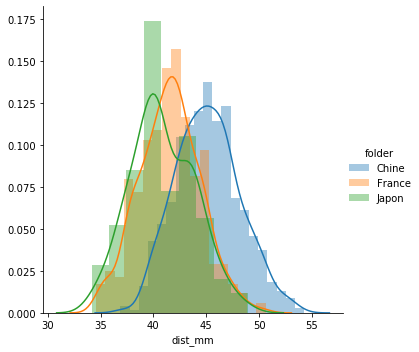

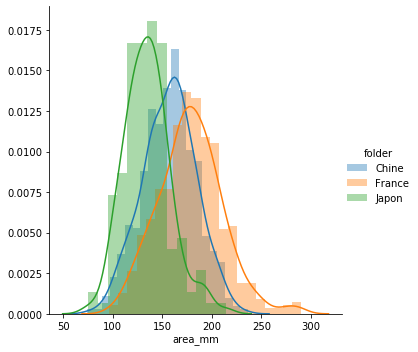

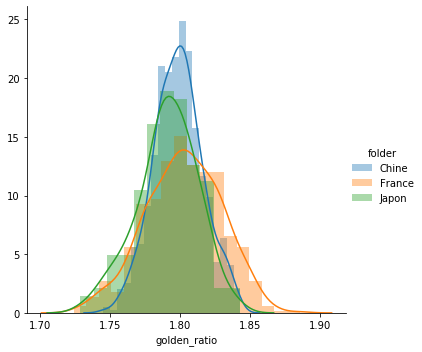

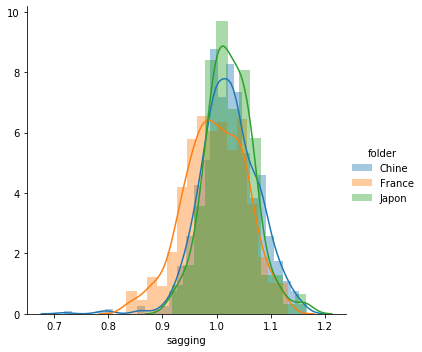

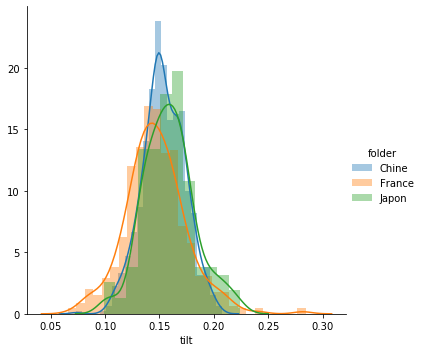

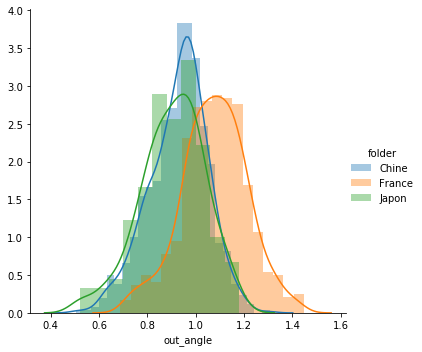

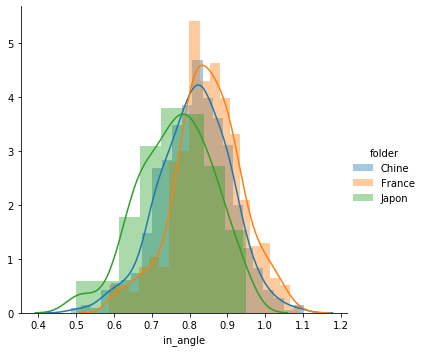

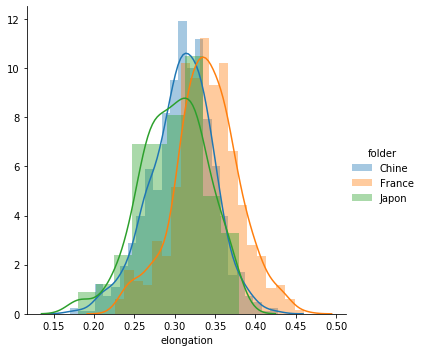

In [18]:
# Observation des ditributions des paramètres selon les pays
for col_name in cols[3:]:
    print(col_name)
    sns.FacetGrid(my_data,hue = "folder", height = 5).map(sns.distplot, col_name).add_legend()

c:\mypython\image_env\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


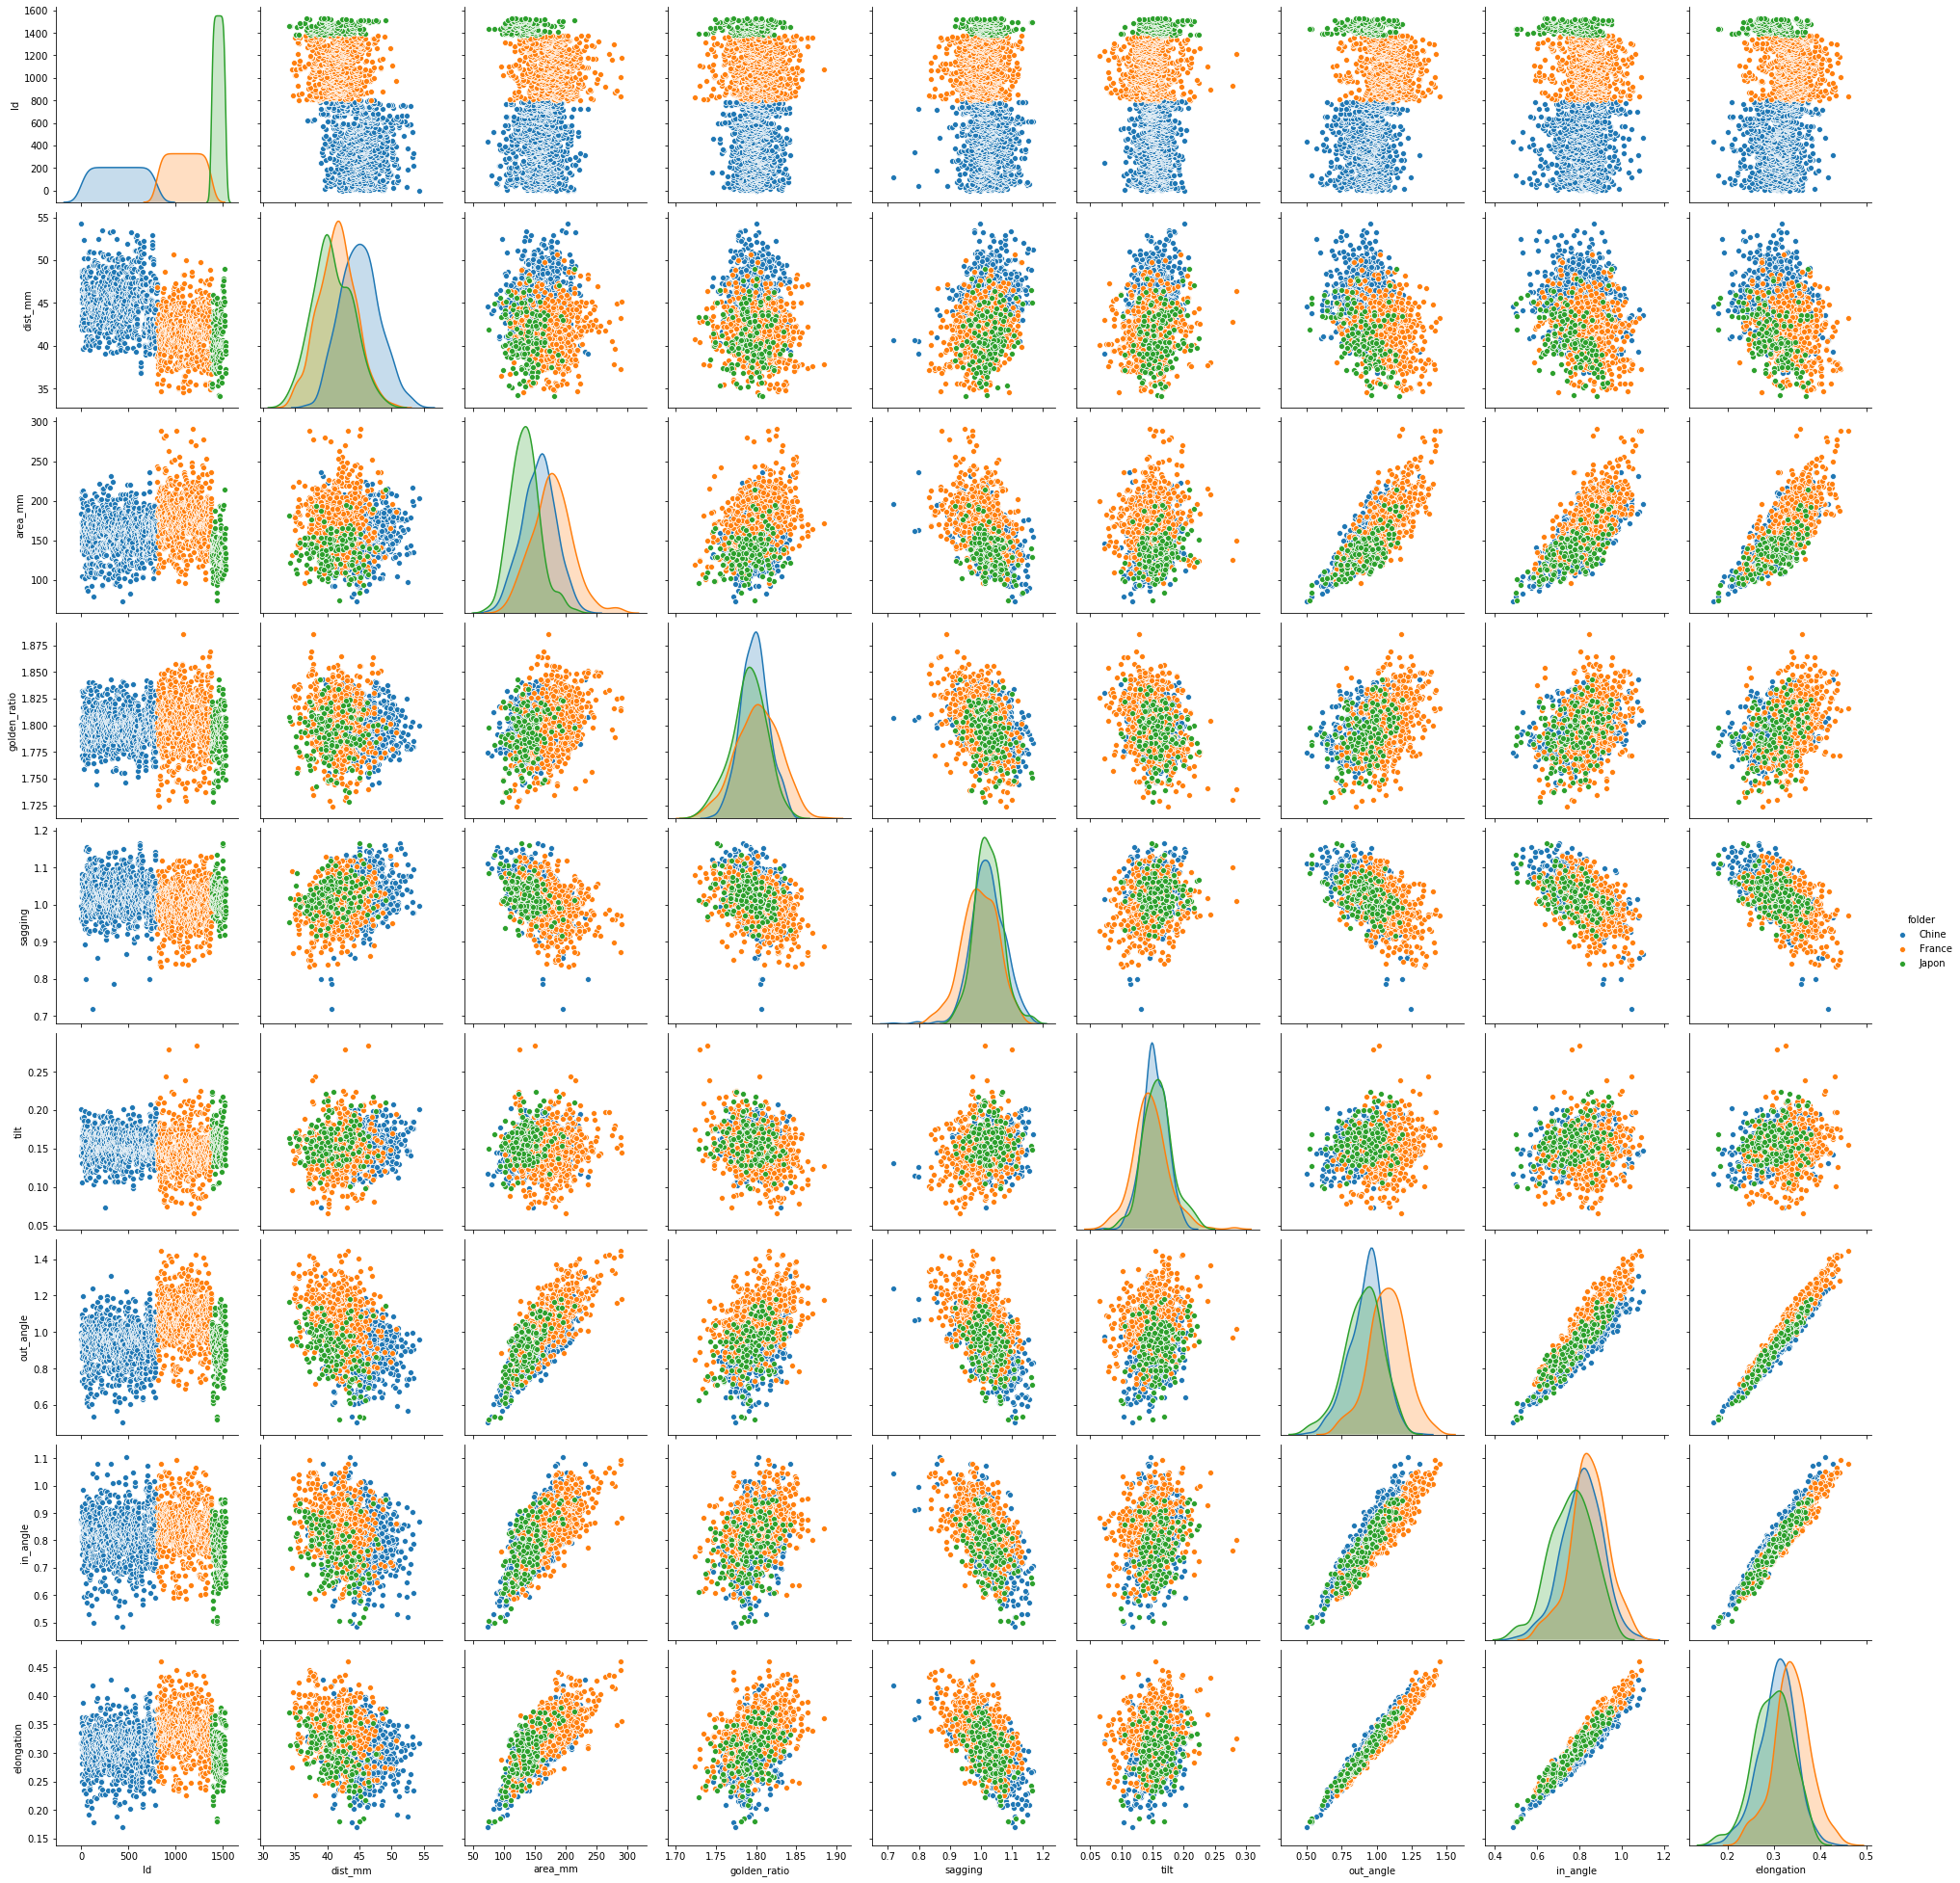

In [19]:
sns.pairplot(my_data, hue = "folder", size=3)
plt.show()

In [42]:
# normalisation des données (données centrées réduites)
sc = StandardScaler()
my_cols=["dist_mm","area_mm","golden_ratio","sagging","tilt","out_angle","in_angle","elongation"]
my_data_norm = sc.fit_transform(my_data[my_cols])

# nb observations
n = my_data_norm.shape[0]
# nb variables explicatives
p = my_data_norm.shape[1]

In [141]:
print(my_data_norm.shape)
new_cols=["dist_n","area_n","golden_ratio_n","sagging_n","tilt_n","out_angle_n","in_angle_n","elongation_n"]
for i in range(len(new_cols)):
    my_data[new_cols[i]] = my_data_norm[:,i]

my_data.describe()

(1530, 8)


,dist_mm,area_mm,golden_ratio,sagging,tilt,out_angle,in_angle,elongation,dist_n,area_n,golden_ratio_n,sagging_n,tilt_n,out_angle_n,in_angle_n,elongation_n
count,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1.530000e+03,1.530000e+03,1.530000e+03,1.530000e+03,1.530000e+03,1.530000e+03,1.530000e+03,1.530000e+03
mean,43.361082,162.721454,1.799109,1.013005,0.151716,0.981571,0.820527,0.318825,-6.315935e-16,-5.572884e-17,1.265509e-15,1.374645e-15,-2.507798e-16,4.458307e-16,-8.359326e-16,1.857628e-16
std,3.511831,32.011025,0.022274,0.055332,0.023966,0.147497,0.097644,0.042731,1.000327e+00,1.000327e+00,1.000327e+00,1.000327e+00,1.000327e+00,1.000327e+00,1.000327e+00,1.000327e+00
min,34.150481,73.372500,1.723628,0.718784,0.065489,0.502728,0.485060,0.170069,-2.623592e+00,-2.792106e+00,-3.389766e+00,-5.319074e+00,-3.599110e+00,-3.247510e+00,-3.436737e+00,-3.482365e+00
25%,40.923986,140.710781,1.784982,0.978550,0.136968,0.889401,0.761749,0.292929,-6.941942e-01,-6.878214e-01,-6.344231e-01,-6.228977e-01,-6.156051e-01,-6.250929e-01,-6.021539e-01,-6.062281e-01
50%,43.261970,162.107701,1.799001,1.013703,0.151243,0.981430,0.824439,0.320770,-2.823164e-02,-1.917945e-02,-4.837939e-03,1.261122e-02,-1.976763e-02,-9.515711e-04,4.008163e-02,4.552879e-02
75%,45.726099,183.515625,1.813118,1.048863,0.166798,1.073391,0.885634,0.346458,6.736627e-01,6.498064e-01,6.291252e-01,6.482536e-01,6.295048e-01,6.227269e-01,6.669995e-01,6.468831e-01
max,54.255124,290.457175,1.885176,1.166163,0.284359,1.446669,1.102816,0.460469,3.103111e+00,3.991671e+00,3.865210e+00,2.768875e+00,5.536462e+00,3.154296e+00,2.891958e+00,3.315890e+00


In [172]:
# on veut representer les populations par grandeur
radar_data = my_data.drop(my_cols, axis=1)
radar_data = radar_data.drop('name', axis=1)
mean_radar = radar_data.groupby('folder').mean()

mean_china = mean_radar.iloc[0]

dist_n            0.503938
area_n           -0.185381
golden_ratio_n   -0.029903
sagging_n         0.175848
tilt_n            0.087371
out_angle_n      -0.363682
in_angle_n       -0.081672
elongation_n     -0.251337
Name: Chine, dtype: float64


[0.5039383970684068, -0.18538054849199928, -0.029902783437971196, 0.17584831471444012, 0.0873712954098258, -0.3636816563769507, -0.08167163054490573, -0.25133680578744744]


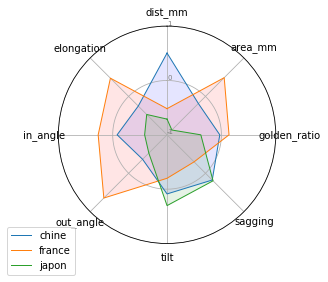

In [176]:

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N_cat) * 2 * pi for n in range(N_cat)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([-1,0,1], ["-1","0","1"], color="grey", size=7)
plt.ylim(-1,1)
 

# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values= mean_radar.iloc[0].values.flatten().tolist()
print(values)
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="chine")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=mean_radar.iloc[1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="france")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=mean_radar.iloc[2].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="japon")
ax.fill(angles, values, 'g', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [38]:
# vérifcation modification des données
np.mean(my_data_norm,axis=0)
np.std(my_data_norm,axis=0,ddof=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [44]:
from sklearn.decomposition import PCA
my_acp = PCA(svd_solver='full')
coord = my_acp.fit_transform(my_data_norm)
valeurs_propres =  (n-1)/n*my_acp.explained_variance_
ratio_vp = my_acp.explained_variance_ratio_
print(my_acp.n_components_)
print(my_acp.explained_variance_)
print(ratio_vp)

8
[4.2659081  1.33364422 0.99396571 0.56977027 0.4902093  0.2643698
 0.07515787 0.01220689]
[0.53288999 0.16659657 0.12416451 0.07117473 0.06123611 0.03302463
 0.00938859 0.00152486]


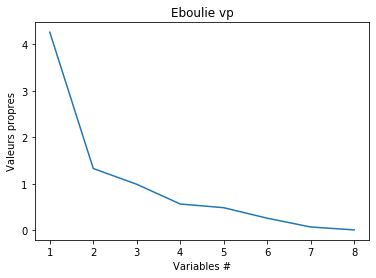

In [47]:
# affichage des valeurs propres et explication de la variance
# eboulis valeurs propres
plt.plot(np.arange(1,p+1),valeurs_propres)
plt.title("Eboulie vp")
plt.ylabel("Valeurs propres")
plt.xlabel("Variables #")
plt.show()

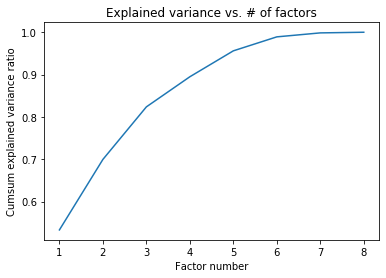

In [49]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(my_acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [51]:
print(coord.shape)

(1530, 8)


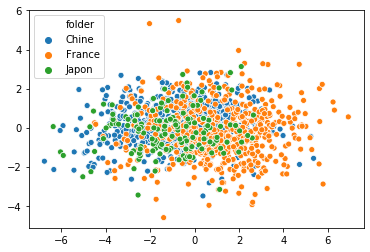

In [58]:
sns.scatterplot(coord[:,0],coord[:,1],hue=my_data['folder'])

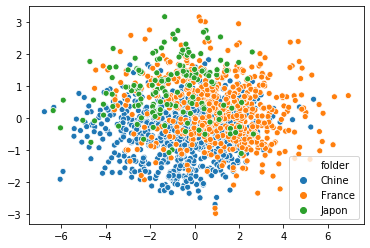

In [56]:
sns.scatterplot(coord[:,0],coord[:,2],hue=my_data['folder'])

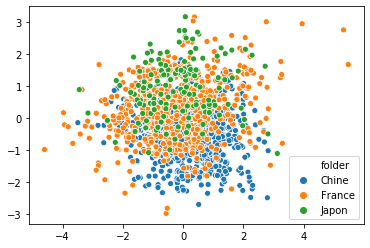

In [57]:
sns.scatterplot(coord[:,1],coord[:,2],hue=my_data['folder'])

In [60]:
# contribution des individus dans l'intertie totale
di = np.sum(coord**2, axis=1)
print(pd.DataFrame({'name':my_data['name'], 'd_i':di}))

                                                   name        d_i
Id                                                                
0                E:\Data\CT2020\Portraits\Chine\021.JPG  15.727819
1                E:\Data\CT2020\Portraits\Chine\024.JPG   2.092803
2                E:\Data\CT2020\Portraits\Chine\025.JPG   6.044855
3                E:\Data\CT2020\Portraits\Chine\027.JPG   6.545249
4                E:\Data\CT2020\Portraits\Chine\030.JPG   5.401400
...                                                 ...        ...
1525  E:\Data\CT2020\Portraits\Japon\J190594_51_J28.jpg   8.836763
1526  E:\Data\CT2020\Portraits\Japon\J190594_51_J56.jpg   7.189873
1527   E:\Data\CT2020\Portraits\Japon\J190594_52_J0.jpg  10.498424
1528  E:\Data\CT2020\Portraits\Japon\J190594_52_J28.jpg   6.523991
1529  E:\Data\CT2020\Portraits\Japon\J190594_52_J56.jpg  10.373412

[1530 rows x 2 columns]


In [62]:
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,0]/di
    
cos2_data = pd.DataFrame({'name':my_data['name'],'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]})
print(cos2_data)

                                                   name    COS2_1    COS2_2
Id                                                                         
0                E:\Data\CT2020\Portraits\Chine\021.JPG  0.003904  0.000248
1                E:\Data\CT2020\Portraits\Chine\024.JPG  0.587218  0.280589
2                E:\Data\CT2020\Portraits\Chine\025.JPG  0.544580  0.090090
3                E:\Data\CT2020\Portraits\Chine\027.JPG  0.384009  0.058670
4                E:\Data\CT2020\Portraits\Chine\030.JPG  0.027127  0.005022
...                                                 ...       ...       ...
1525  E:\Data\CT2020\Portraits\Japon\J190594_51_J28.jpg  0.018446  0.002087
1526  E:\Data\CT2020\Portraits\Japon\J190594_51_J56.jpg  0.049167  0.006838
1527   E:\Data\CT2020\Portraits\Japon\J190594_52_J0.jpg  0.568307  0.054133
1528  E:\Data\CT2020\Portraits\Japon\J190594_52_J28.jpg  0.555437  0.085138
1529  E:\Data\CT2020\Portraits\Japon\J190594_52_J56.jpg  0.604137  0.058239

[1530 rows 

In [65]:
cos2_data.sort_values(by=['COS2_1','COS2_2'], ascending=False)

,name,COS2_1,COS2_2
Id,,,
205,E:\Data\CT2020\Portraits\Chine\432.JPG,9.925873e-01,4.886796e-02
65,E:\Data\CT2020\Portraits\Chine\151.JPG,9.784915e-01,3.386301e-02
652,E:\Data\CT2020\Portraits\Chine\V20_T0.JPG,9.756861e-01,4.042048e-02
1189,E:\Data\CT2020\Portraits\France\S101FR - IMG_7...,9.713327e-01,8.429381e-02
504,E:\Data\CT2020\Portraits\Chine\S216 CH - 431.JPG,9.698977e-01,5.366005e-02
...,...,...,...
899,E:\Data\CT2020\Portraits\France\IMG_7103.JPG,1.622712e-05,1.181957e-05
1032,E:\Data\CT2020\Portraits\France\IMG_7537.JPG,1.129954e-05,4.397491e-06
1237,E:\Data\CT2020\Portraits\France\S149FR - IMG_7...,1.041807e-05,6.428284e-07


In [67]:
sqrt_vp = np.sqrt(valeurs_propres)
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = my_acp.components_[k,:] * sqrt_vp[k]

print(corvar)

[[-3.51107534e-01  3.96359104e-01 -8.06651150e-01  2.01488656e-01
   9.18551170e-02 -1.27684505e-01  5.99873745e-02 -1.52512169e-04]
 [ 8.20577914e-01  1.95218808e-01 -2.44513553e-01  2.40655458e-01
  -1.84848717e-01  3.60532708e-01 -8.17023096e-02  3.38059565e-03]
 [ 5.02175905e-01 -4.50773937e-01 -4.94598380e-01 -5.40813451e-01
   6.39446281e-02  5.17552241e-02 -2.73480045e-02 -2.02467400e-04]
 [-7.03279587e-01  3.20916409e-01 -4.90697186e-02 -2.56965127e-01
  -5.76524713e-01 -3.67179138e-02 -1.48571269e-02  4.67794354e-03]
 [ 4.79465443e-02  8.78867417e-01  1.65676542e-01 -3.28683567e-01
   2.83515432e-01  9.56206372e-02 -1.69352170e-02 -6.93099363e-04]
 [ 9.58823646e-01  1.08256973e-01  7.33714235e-02 -4.97835541e-02
  -1.46413624e-01  4.99167379e-03  1.91783992e-01 -5.32250897e-02]
 [ 9.22105089e-01  1.79044027e-01 -1.22826514e-04  4.17099447e-02
  -6.00894985e-02 -2.94712033e-01 -1.55007723e-01 -3.78468140e-02]
 [ 9.73546632e-01  1.23259411e-01  5.45491779e-02 -1.11296928e-02
  -

In [72]:
data_corvar = pd.DataFrame({'id':my_cols,'COR_1':corvar[:,0],'COR_2':corvar[:,1]})
print(data_corvar)

             id     COR_1     COR_2
0       dist_mm -0.351108  0.396359
1       area_mm  0.820578  0.195219
2  golden_ratio  0.502176 -0.450774
3       sagging -0.703280  0.320916
4          tilt  0.047947  0.878867
5     out_angle  0.958824  0.108257
6      in_angle  0.922105  0.179044
7    elongation  0.973547  0.123259


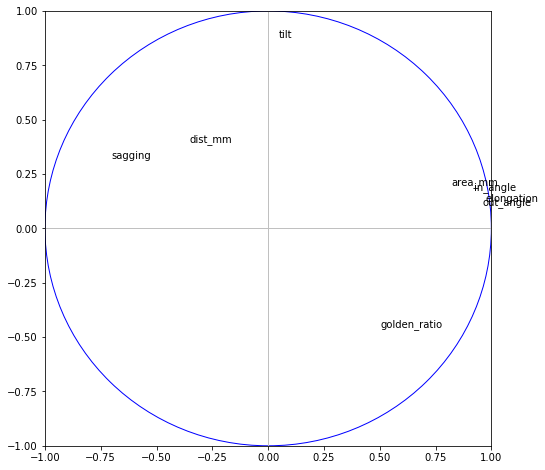

In [73]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
for j in range(p):
    plt.annotate(my_cols[j], (corvar[j,0],corvar[j,1]))

plt.plot([-1,1],[0,0], color ='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1], color ='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

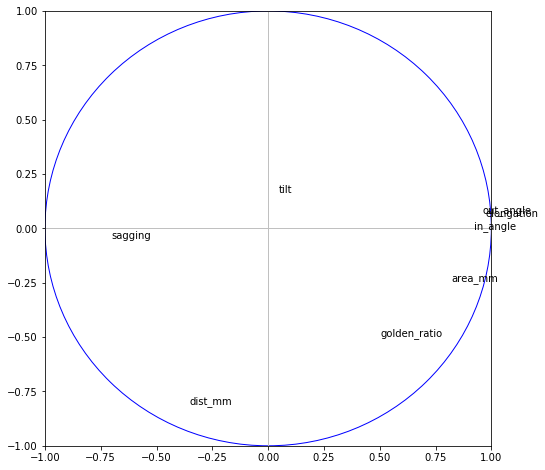

In [177]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
for j in range(p):
    plt.annotate(my_cols[j], (corvar[j,0],corvar[j,2]))

plt.plot([-1,1],[0,0], color ='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1], color ='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

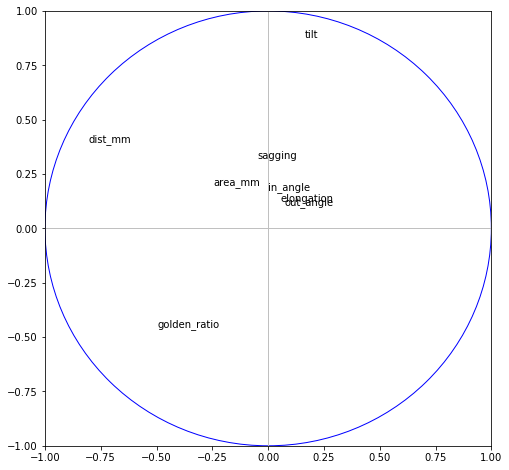

In [179]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
for j in range(p):
    plt.annotate(my_cols[j], (corvar[j,2],corvar[j,1]))

plt.plot([-1,1],[0,0], color ='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1], color ='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

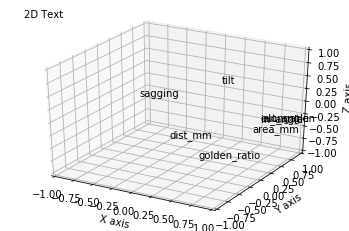

In [185]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

# Demo 1: zdir
#zdirs = (None, 'x', 'y', 'z', (1, 1, 0), (1, 1, 1))
xs = corvar[:,0]
ys = corvar[:,1]
zs = corvar[:,2]
labels = my_cols

for x, y, z, label in zip(xs, ys, zs, labels):
    ax.text(x, y, z, label, None)
    
# Tweaking display region and labels
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

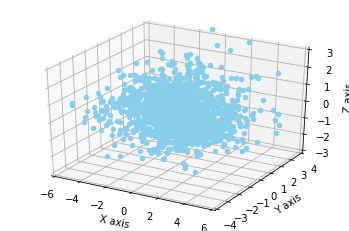

In [190]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Demo 1: zdir
#zdirs = (None, 'x', 'y', 'z', (1, 1, 0), (1, 1, 1))
xs = coord[:,0]
ys = coord[:,1]
zs = coord[:,2]
labels = my_data['folder']

for x, y, z, label in zip(xs, ys, zs, labels):
    ax.scatter(x, y, z,c='skyblue')
    #ax.text(x, y, z, label, None)
    
# Tweaking display region and labels
ax.set_xlim(-6, 6)
ax.set_ylim(-4, 4)
ax.set_zlim(-3, 3)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

In [78]:
# cos2 des variables
cos2var = corvar**2
cos2var_data =pd.DataFrame({'id':my_cols,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1],'COS2_3':cos2var[:,3]})
print(cos2var_data)

             id    COS2_1    COS2_2    COS2_3
0       dist_mm  0.123277  0.157101  0.040598
1       area_mm  0.673348  0.038110  0.057915
2  golden_ratio  0.252181  0.203197  0.292479
3       sagging  0.494602  0.102987  0.066031
4          tilt  0.002299  0.772408  0.108033
5     out_angle  0.919343  0.011720  0.002478
6      in_angle  0.850278  0.032057  0.001740
7    elongation  0.947793  0.015193  0.000124


# Analyse par regression logistique multinomiale

In [101]:
X = my_data_norm
X2 = coord
Ychine = (my_data['folder']=='Chine')*1
Yfrance = (my_data['folder']=='France')*1
Yjapon = (my_data['folder']=='Japon')*1
print(X)

[[ 3.10311147  1.25465906  0.03527516 ... -0.16767403  0.49253689
  -0.03512755]
 [-0.29544232  0.67213025  0.0441644  ...  0.08892157  0.5765883
   0.37406326]
 [ 0.85403329  1.532037   -0.21961613 ...  0.72289384  1.01024576
   0.95679896]
 ...
 [-1.21386061 -1.49187467  0.33012367 ... -0.87769026 -1.91523887
  -1.2118057 ]
 [-0.95367575 -1.3781462   0.02534417 ... -0.53167885 -1.48038542
  -0.9284188 ]
 [-1.12282365 -1.55972504 -0.47011759 ... -0.73008667 -1.78658783
  -1.11967107]]


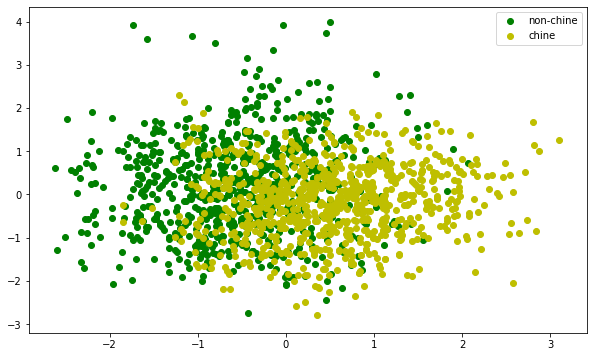

In [108]:
#visualisation des données
plt.figure(figsize=(10, 6))
plt.scatter(X[Ychine == 0][:, 0], X[Ychine == 0][:, 1], color='g', label='non-chine')
plt.scatter(X[Ychine == 1][:, 0], X[Ychine == 1][:, 1], color='y', label='chine')
plt.legend();

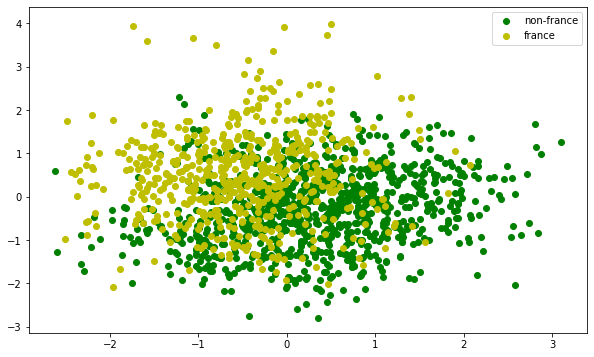

In [98]:
#visualisation des données
plt.figure(figsize=(10, 6))
plt.scatter(X[Yfrance == 0][:, 0], X[Yfrance == 0][:, 1], color='g', label='non-france')
plt.scatter(X[Yfrance == 1][:, 0], X[Yfrance == 1][:, 1], color='y', label='france')
plt.legend();

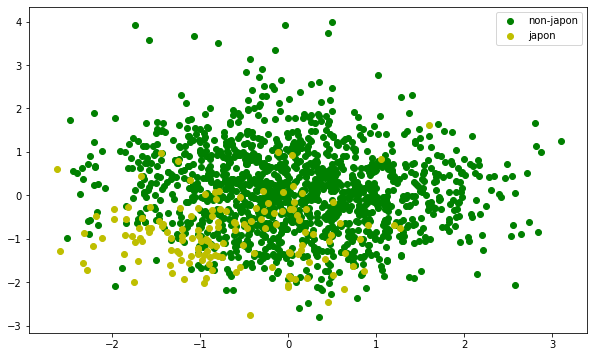

In [99]:
#visualisation des données
plt.figure(figsize=(10, 6))
plt.scatter(X[Yjapon == 0][:, 0], X[Yjapon == 0][:, 1], color='g', label='non-japon')
plt.scatter(X[Yjapon == 1][:, 0], X[Yjapon == 1][:, 1], color='y', label='japon')
plt.legend();

In [106]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1e20)
model_chine = model.fit(X,Ychine)
model_france = model.fit(X,Yfrance)
model_japon = model.fit(X,Yjapon)

In [107]:
print(model_chine)

LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
